# CS 6220 HW4 -- Xinan Wang

In [80]:
# Import the required packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_regression
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram 

## 1 Clustering the Iris Dataset [100 points]

In [67]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width",
"Petal Length", "Petal Width",
"Name"])

In [68]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.1 Clustering Data with k-Means

#### [15 pts] Plot a scatter plot matrix between all features (see pandas.plotting.scatter matrix). Use the “Name” column to color the points. Note that you may have to convert the “Name” column into integers to use it for specifying the plot colors (see the ‘c’ parameter). Resize the plot as needed. Do the three classes appear to be equally well-separated or is one more different than the others?

In [69]:
df['Name'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64

In [70]:
# Change 'Name' column into integers

name = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
}

In [71]:
df['Name'] = df['Name'].map(name)

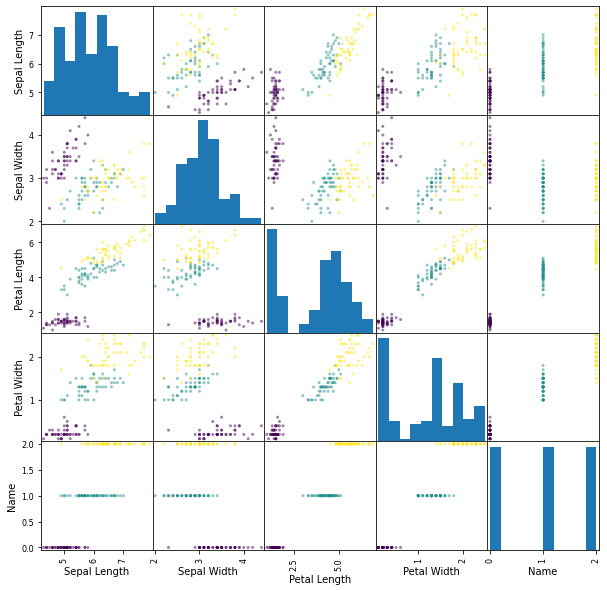

In [72]:
# Plot the scatter matrix

scatter_matrix = pd.plotting.scatter_matrix(df, c=df['Name'],figsize = [10,10])

In this scatter matrix plot, yellow color represents '2' which is 'Iris-virginica'; green color represents '1' which is 'Iris-versicolor'; purple color represents '0' which is 'Iris-setosa'.

Based on the scatter matrix plot, we can find that the purple color which means 'Iris-setosa', are well-separated with the other clusters, which are 'Iris-versicolor' and 'Iris-virginica'. However, the other 2 clusters which are 'Iris-versicolor' and 'Iris-virginica' are overlapping with each other. And they are more likely to be prototype-based clusters or contiguity-based clusters.

Therefore, the feature classes that equally well separated are: 
(1) 'Iris-setosa' and 'Iris-versicolor'
(2) 'Iris-setosa' and 'Iris-virginica'

And the clusters are prototype-based clusters that are different than the others:
(1) 'Iris-versicolor' and 'Iris-virginica'

#### [15 pts] Cluster the the data using k-Means clustering (see sklearn.cluster.KMeans). Form 3 clusters (n clusters=3), with the four features as the input data, and plot the resulting clusters as a 2D scatter plot. Use “Petal Length” for the x-axis of the plot and “Petal Width” for the y-axis, with each point colored according to its assigned cluster label.

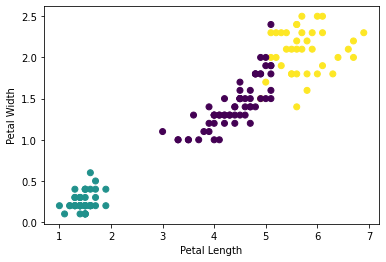

In [73]:
# Get the X dataset
X = df[['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width']]

# Fit the kmeans model
kmeans_model = KMeans(n_clusters = 3, random_state = 0).fit(X)

# Plot the resulting clusters
plt.scatter(x = df['Petal Length'],y = df['Petal Width'], c=kmeans_model.predict(X))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

#### [20 pts] Show the cross-tabulation (see pandas.crosstab) of the actual class values and the cluster labels. How many instances belong to an incorrect cluster? Do any of the cluster labels correspond perfectly to a class label? Do these observations agree with what you observed from the scatter plot matrix?

In [74]:
# Create a cross-tabulation of the actual class values and the cluster labels

cross_tabulation = pd.crosstab(df['Name'],kmeans_model.labels_)
print(cross_tabulation)

col_0   0   1   2
Name             
0       0  50   0
1      48   0   2
2      14   0  36


Therefore, 2 instances of class 1 are mistakenly clustered to class 2 and 14 instances of class 2 are mistakenly clustered to class 1.

Class 0 perfectly correspond to class cluster label 1.

Class 1 has 48 instances correctly correspond to class cluster lable 0, and class 2 has 36 instances correctly correspond to class cluster lable 2.

Yes, these observations agree with what I have observed from the scatter plot matrix. Class 0 which is Iris-setosa are perfectly clustered from the other 2 clusters, and the other 2 classes which are Iris-versicolor and Iris-virginica are prototype-based with each other.

### 1.2 Hierarchical Clustering of Features

#### [25 pts] To assess how similar the features are, calculate the mutual information between all pairs of features (see sklearn.feature selection.mutual info regression); that is, use each feature as the target variable once in the calculation. Create a DataFrame from the output and label the indices and columns of the DataFrame with the appropriate feature names.

In [79]:
X.columns

Index(['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width'], dtype='object')

In [77]:
mi = []

for feature in X.columns:
    info = mutual_info_regression(X, X[feature])
    mi.append(info)
    
mi = pd.DataFrame(mi, columns = X.columns, index = X.columns)
mi

,Petal Length,Petal Width,Sepal Length,Sepal Width
Petal Length,3.130009,1.165525,0.883000,0.343811
Petal Width,1.221419,2.739564,0.626141,0.377383
Sepal Length,0.852407,0.637167,3.211286,0.312547
Sepal Width,0.351425,0.428636,0.282286,2.614521


#### [25 pts] Create a dendrogram from the mutual information DataFrame. According to the dendrogram, which pair of features is most similar? Which feature is most unlike the others? You may use the following function to generate the dendrogram, which takes as input the fit cluster model; you can pass the feature names with the labels parameter.

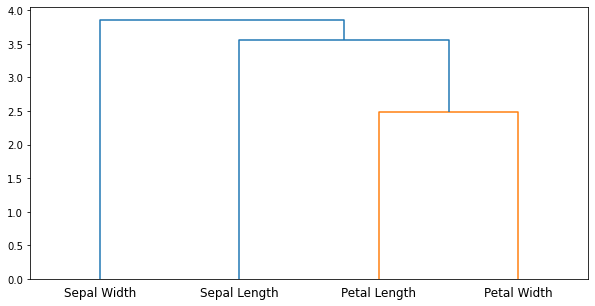

In [81]:
Z = hierarchy.linkage(mi, method = 'ward')

plt.figure(figsize=(10,5))
dn = hierarchy.dendrogram(Z,labels = mi.index)
plt.show()

According to the dendrogram, the pair of 'Petal Length' and 'Petal Width' is the most similar because they are under a same hierarchy. And Sepal Width feature is the most unlike the others because it's under the toppest hierarchy.